<a href="https://colab.research.google.com/github/jyh11224/2025-DongA-University-Summer-School/blob/main/%EC%8B%A4%EC%8A%B54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
mlp_sgd=Sequential()
mlp_sgd.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_sgd.add(Dense(units=10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
mlp_sgd.compile(loss='MSE',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])
hist_sgd=mlp_sgd.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('SGD 정확률=',mlp_sgd.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
469/469 - 5s - 12ms/step - accuracy: 0.2347 - loss: 0.0876 - val_accuracy: 0.3354 - val_loss: 0.0843
Epoch 2/50
469/469 - 4s - 8ms/step - accuracy: 0.3865 - loss: 0.0810 - val_accuracy: 0.4298 - val_loss: 0.0777
Epoch 3/50
469/469 - 6s - 13ms/step - accuracy: 0.4627 - loss: 0.0746 - val_accuracy: 0.5099 - val_loss: 0.0712
Epoch 4/50
469/469 - 4s - 8ms/step - accuracy: 0.5726 - loss: 0.0682 - val_accuracy: 0.6422 - val_loss: 0.0645
Epoch 5/50
469/469 - 5s - 12ms/step - accuracy: 0.6658 - loss: 0.0616 - val_accuracy: 0.7068 - val_loss: 0.0577
Epoch 6/50
469/469 - 5s - 10ms/step - accuracy: 0.7128 - loss: 0.0554 - val_accuracy: 0.7346 - val_loss: 0.0518
Epoch 7/50
469/469 - 4s - 9ms/step - accuracy: 0.7390 - loss: 0.0502 - val_accuracy: 0.7578 - val_loss: 0.0471
Epoch 8/50
469/469 - 6s - 13ms/step - accuracy: 0.7588 - loss: 0.0461 - val_accuracy: 0.7742 - val_loss: 0.0434
Epoch 9/50
469/469 - 4s - 8ms/step - accuracy: 0.7757 - loss: 0.0428 - val_accuracy: 0.7943 - val_loss: 0.0

In [5]:
mlp_adam=Sequential()
mlp_adam.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp_adam.add(Dense(units=10,activation='softmax'))

In [6]:
mlp_adam.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist_adam=mlp_adam.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)
print('Adam 정확률=',mlp_adam.evaluate(x_test,y_test,verbose=0)[1]*100)

Epoch 1/50
469/469 - 5s - 12ms/step - accuracy: 0.9038 - loss: 0.0146 - val_accuracy: 0.9322 - val_loss: 0.0105
Epoch 2/50
469/469 - 6s - 13ms/step - accuracy: 0.9434 - loss: 0.0088 - val_accuracy: 0.9505 - val_loss: 0.0075
Epoch 3/50
469/469 - 9s - 20ms/step - accuracy: 0.9591 - loss: 0.0065 - val_accuracy: 0.9621 - val_loss: 0.0059
Epoch 4/50
469/469 - 6s - 12ms/step - accuracy: 0.9685 - loss: 0.0051 - val_accuracy: 0.9661 - val_loss: 0.0053
Epoch 5/50
469/469 - 5s - 10ms/step - accuracy: 0.9761 - loss: 0.0040 - val_accuracy: 0.9687 - val_loss: 0.0048
Epoch 6/50
469/469 - 6s - 12ms/step - accuracy: 0.9796 - loss: 0.0034 - val_accuracy: 0.9697 - val_loss: 0.0048
Epoch 7/50
469/469 - 5s - 10ms/step - accuracy: 0.9833 - loss: 0.0028 - val_accuracy: 0.9730 - val_loss: 0.0042
Epoch 8/50
469/469 - 5s - 11ms/step - accuracy: 0.9862 - loss: 0.0024 - val_accuracy: 0.9763 - val_loss: 0.0038
Epoch 9/50
469/469 - 6s - 13ms/step - accuracy: 0.9891 - loss: 0.0019 - val_accuracy: 0.9771 - val_loss:

In [7]:
import matplotlib.pyplot as plt

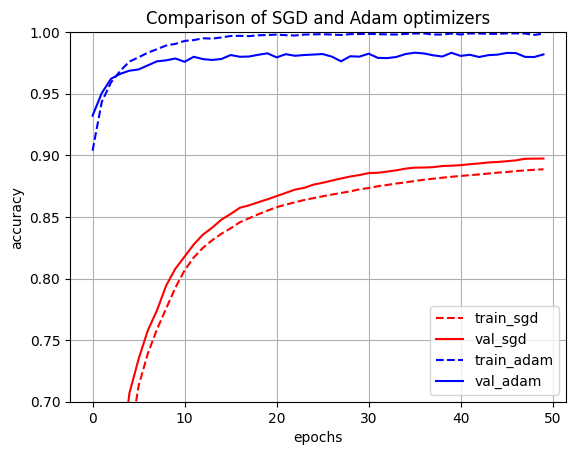

In [8]:
plt.plot(hist_sgd.history['accuracy'],'r--')
plt.plot(hist_sgd.history['val_accuracy'],'r')
plt.plot(hist_adam.history['accuracy'],'b--')
plt.plot(hist_adam.history['val_accuracy'],'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.ylim((0.7,1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd','val_sgd','train_adam','val_adam'])
plt.grid()
plt.show()